In [6]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

# Putanja do osnovnog direktorija dataset-a
base_dir = pathlib.Path('test')

# Definisanje parametara za obradu slika
batch_size = 32
img_height = 256
img_width = 256

# Kreiranje ImageDataGenerator-a za trening set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3)  # Dodat parametar za podelu podataka

# Kreiranje ImageDataGenerator-a za validacioni set
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3)  # Dodat parametar za podelu podataka

# Priprema skupa podataka za treniranje
train_ds = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',  # Specifikacija da je ovo deo za treniranje
    seed=123)

# Priprema skupa podataka za validaciju
val_ds = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',  # Specifikacija da je ovo deo za validaciju
    seed=123)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Korišćenje iste putanje i istih parametara kao i za validacioni skup, osim što ne trebate subset
test_ds = test_datagen.flow_from_directory(
    base_dir,  # Koristite istu putanju kao i za vaš treniranje/validaciju
    target_size=(img_height, img_width),
    batch_size=batch_size,  # Možete odabrati drugačiji batch_size ako želite
    class_mode='binary',  # Ili 'categorical', zavisno od vašeg slučaja
    subset=None,  # Ne postavljate 'subset' jer ovo nije deo podataka sa podelom
    shuffle=False,  # Nemojte mešati podatke ako želite dosledan testni skup
    seed=123) 

# Spremanje imena klasa
class_names = list(train_ds.class_indices.keys())
print(class_names)

# Kreiranje modela (Ostaje isto kao u vašem originalnom kodu)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Testiranje modela (Možete zadržati vaš originalni kod za testiranje)


Found 1401 images belonging to 21 classes.
Found 582 images belonging to 21 classes.
Found 1983 images belonging to 21 classes.
['Earth', 'Jupiter', 'MakeMake', 'Mars', 'Mercury', 'Moon', 'Neptune', 'Pluto', 'Saturn', 'Uranus', 'Venus', 'callisto', 'deimos', 'enceladus', 'europa', 'ganymede', 'io', 'mimas', 'phobos', 'rhea', 'titan']
Epoch 1/10
44/44 [==============================] - 35s 763ms/step - loss: 2.0941 - accuracy: 0.3740 - val_loss: 1.4754 - val_accuracy: 0.5258
Epoch 2/10
44/44 [==============================] - 33s 755ms/step - loss: 1.3070 - accuracy: 0.6003 - val_loss: 1.1555 - val_accuracy: 0.6203
Epoch 3/10
44/44 [==============================] - 34s 769ms/step - loss: 1.0225 - accuracy: 0.6852 - val_loss: 0.8925 - val_accuracy: 0.7131
Epoch 4/10
44/44 [==============================] - 33s 744ms/step - loss: 0.8782 - accuracy: 0.7352 - val_loss: 0.8365 - val_accuracy: 0.7337
Epoch 5/10
44/44 [==============================] - 33s 755ms/step - loss: 0.7161 - accuracy

1/1 [==============================] - 0s 31ms/step


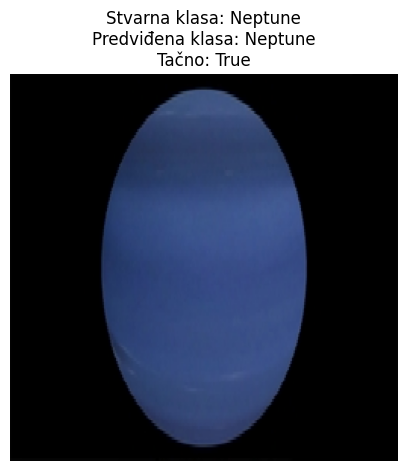

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


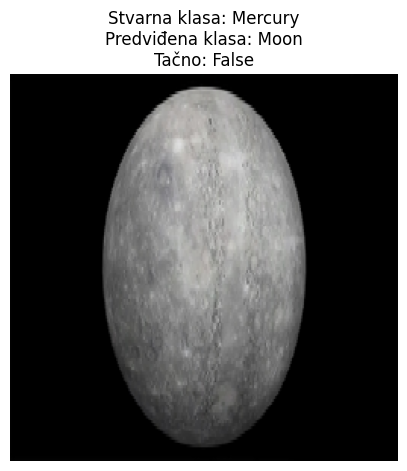

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


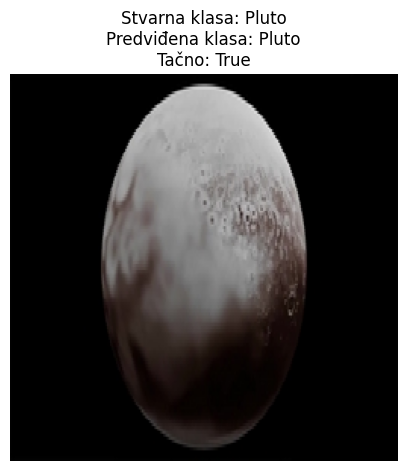

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 29ms/step


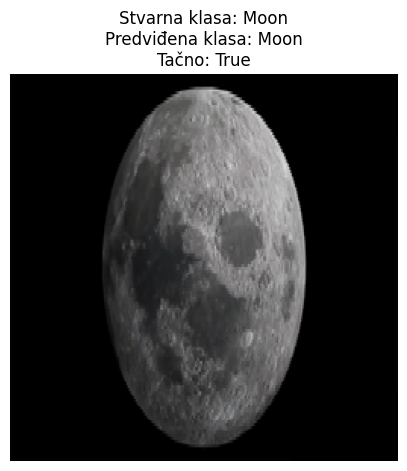

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 30ms/step


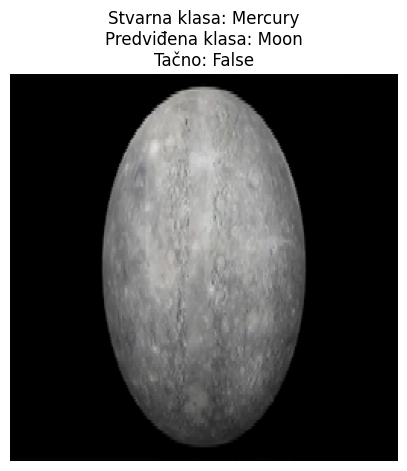

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 32ms/step


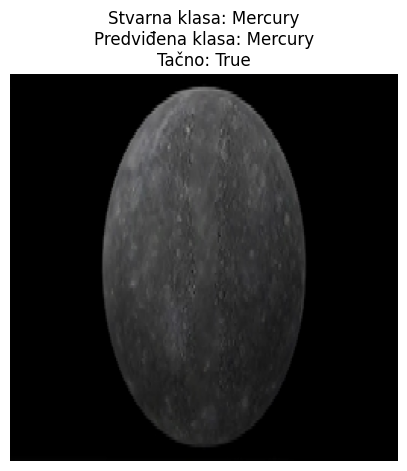

Stvarna klasa: Mercury, Predviđena klasa: Mercury, Tačno: True
1/1 [==============================] - 0s 29ms/step


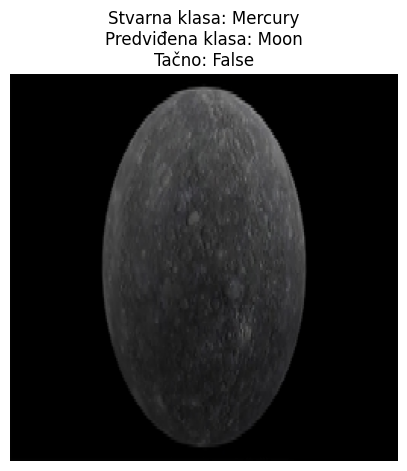

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


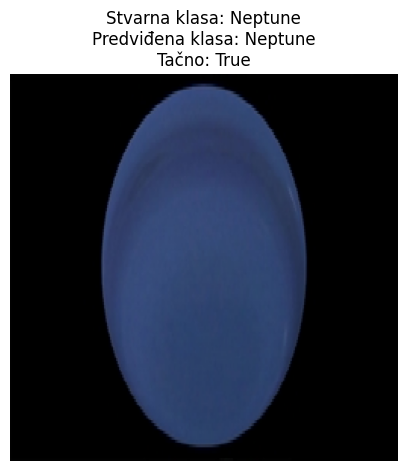

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 29ms/step


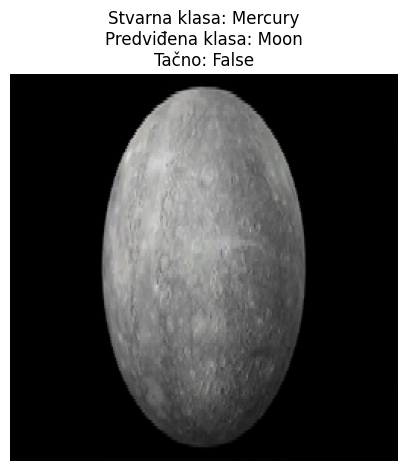

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


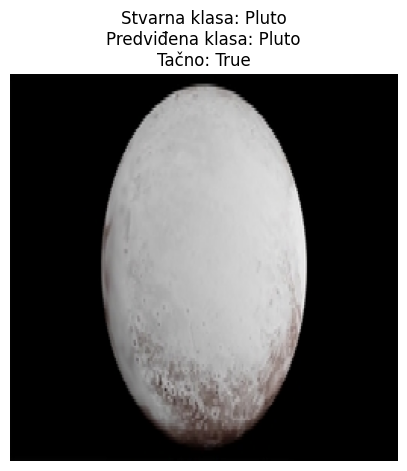

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 32ms/step


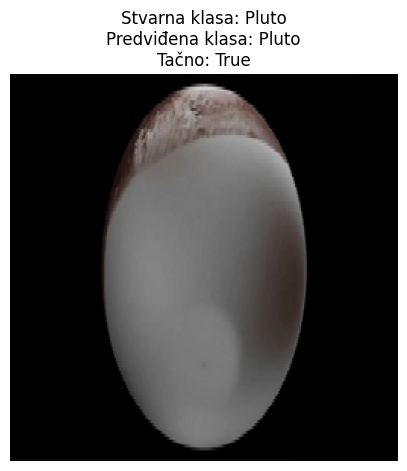

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 30ms/step


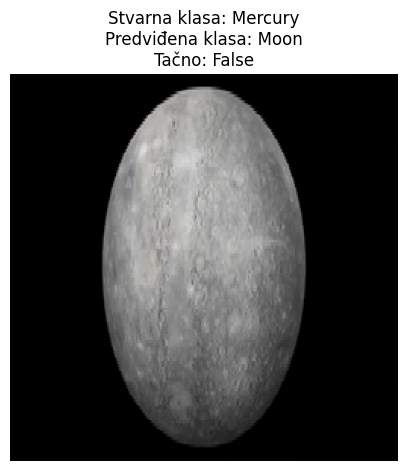

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


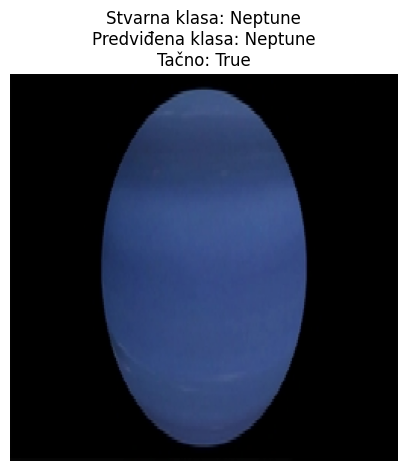

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 29ms/step


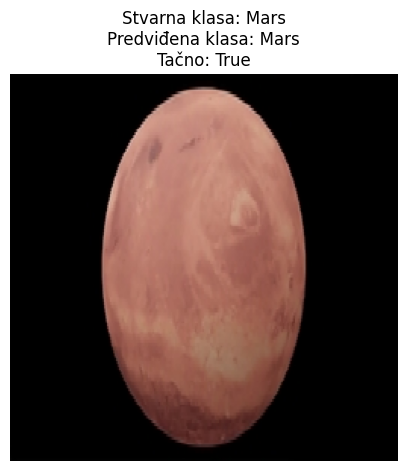

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 32ms/step


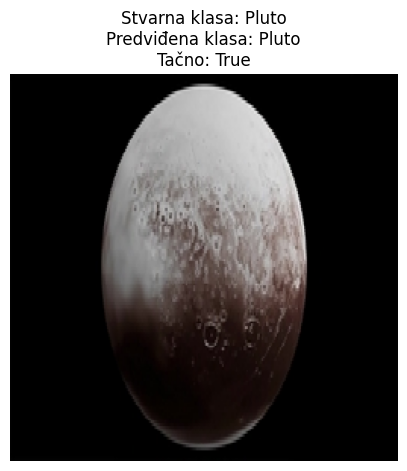

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 30ms/step


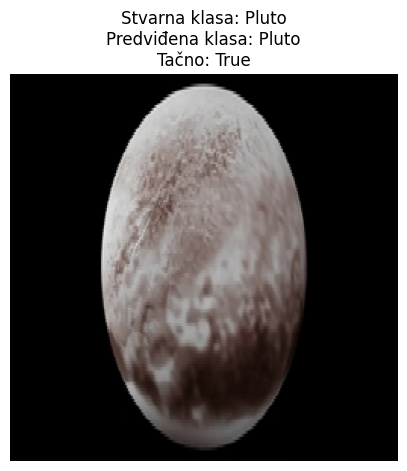

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 30ms/step


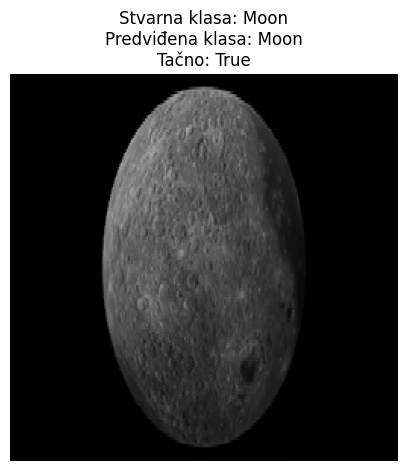

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 31ms/step


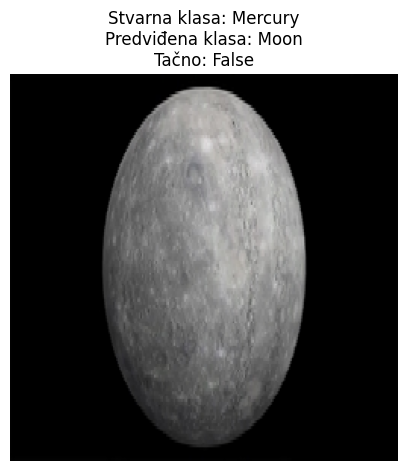

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


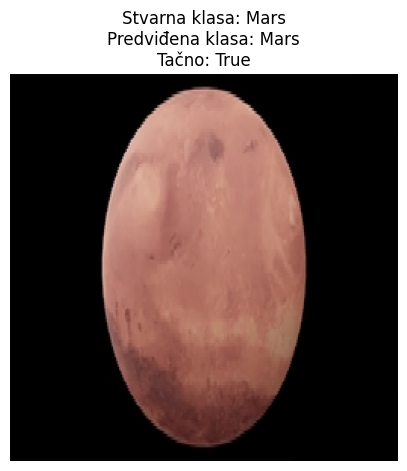

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 30ms/step


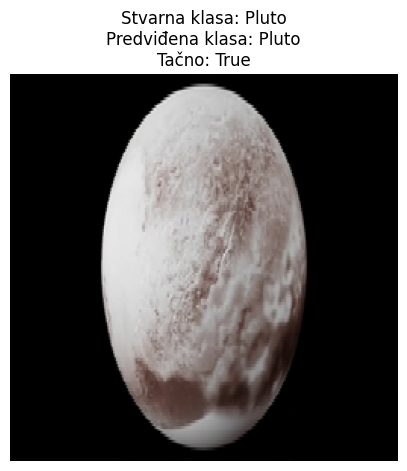

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 31ms/step


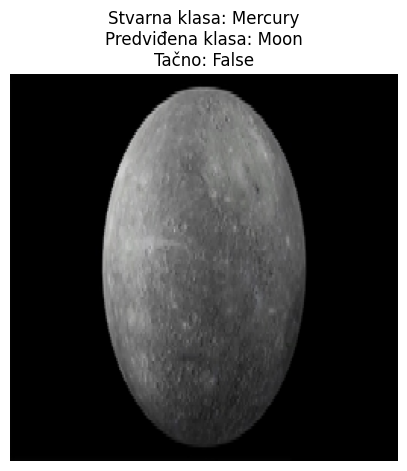

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


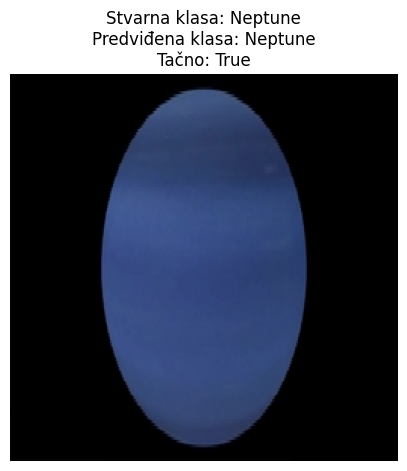

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 30ms/step


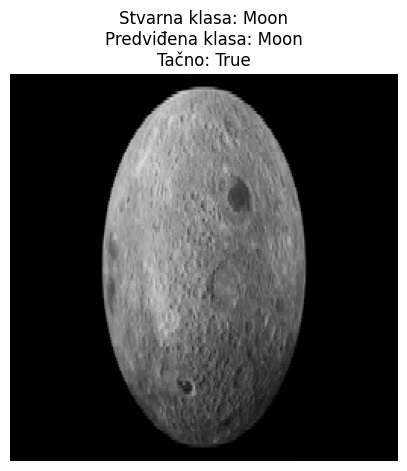

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 32ms/step


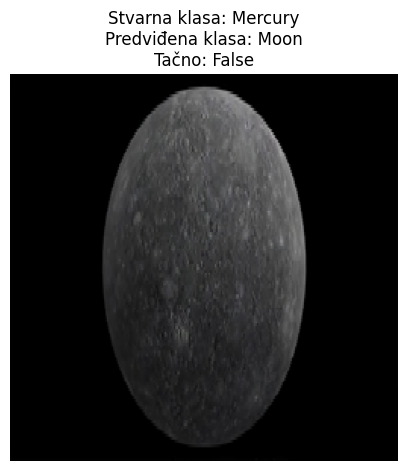

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


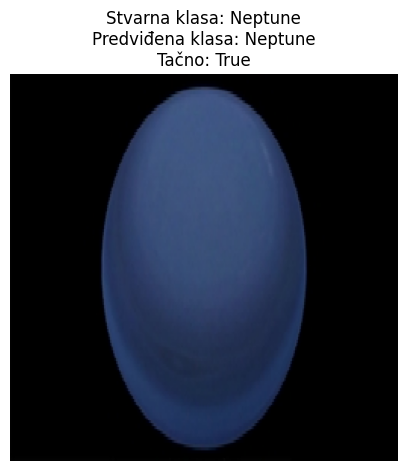

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 40ms/step


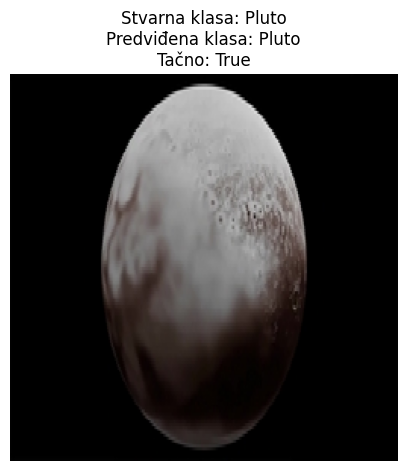

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 30ms/step


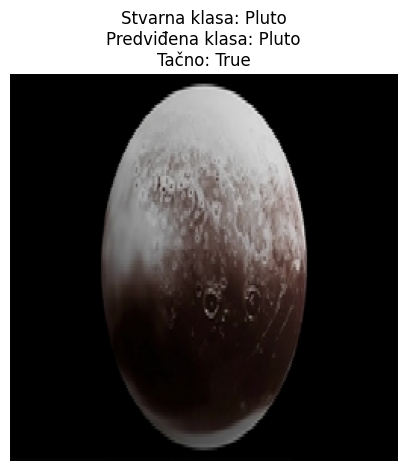

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 32ms/step


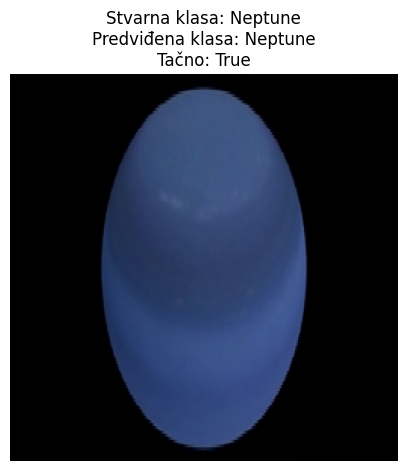

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


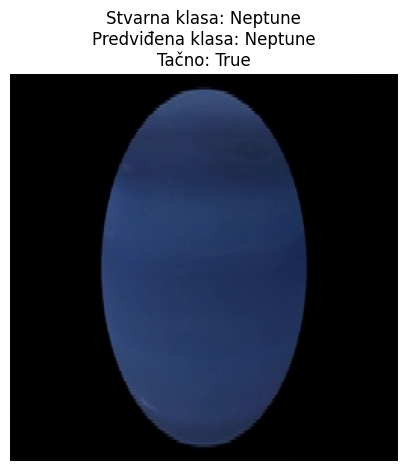

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 30ms/step


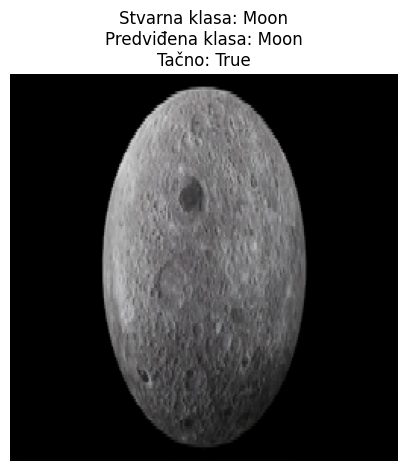

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 31ms/step


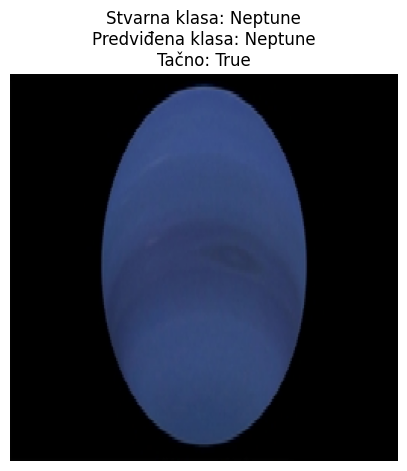

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


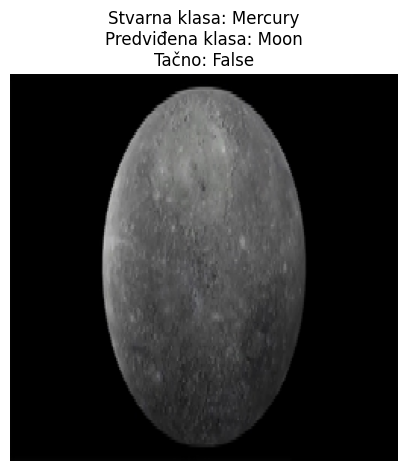

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


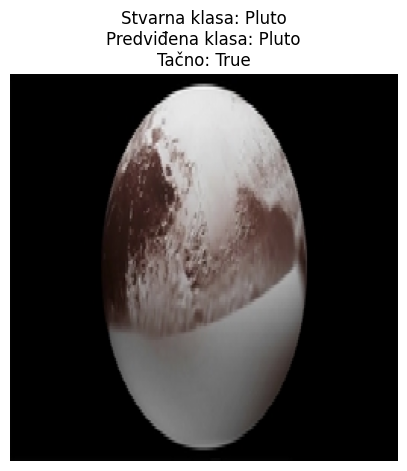

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 30ms/step


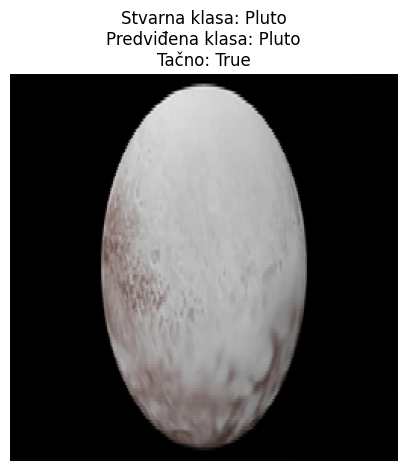

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 30ms/step


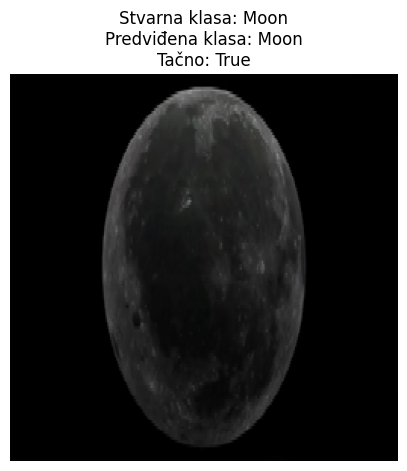

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 42ms/step


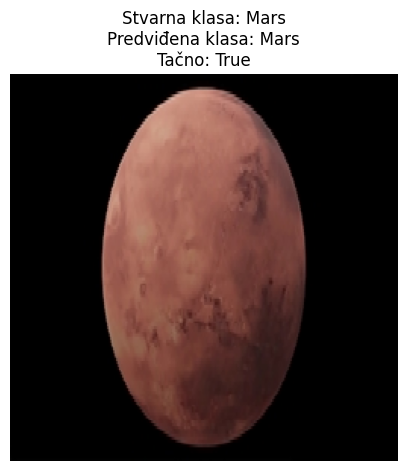

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 29ms/step


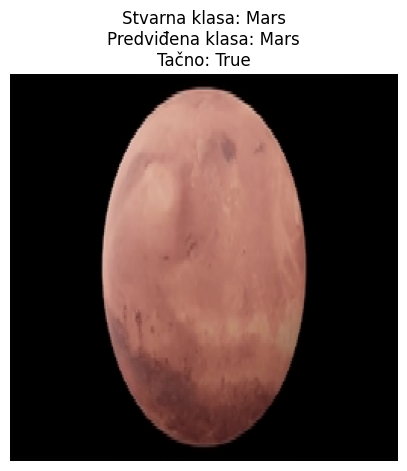

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 30ms/step


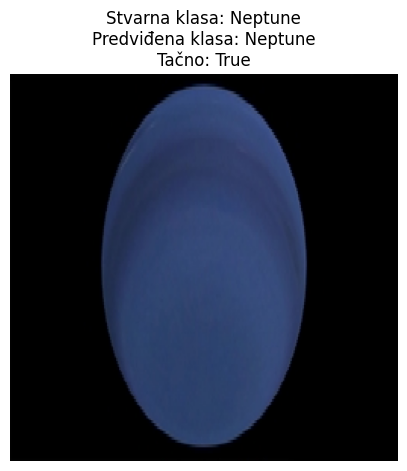

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 33ms/step


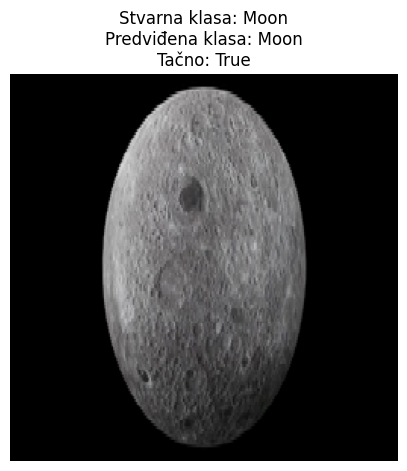

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 30ms/step


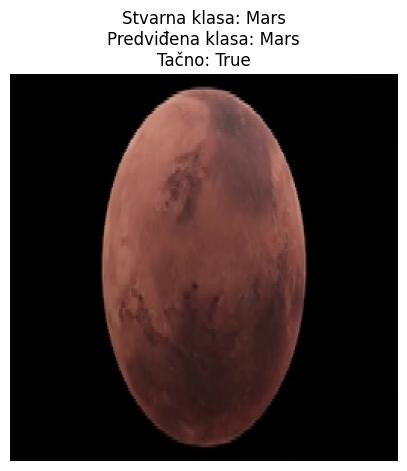

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 30ms/step


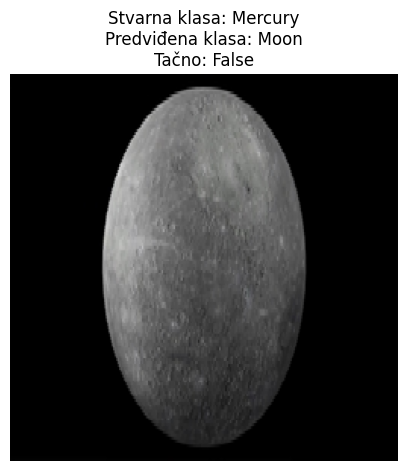

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 37ms/step


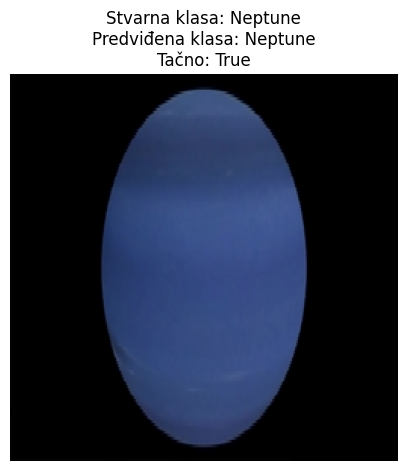

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 28ms/step


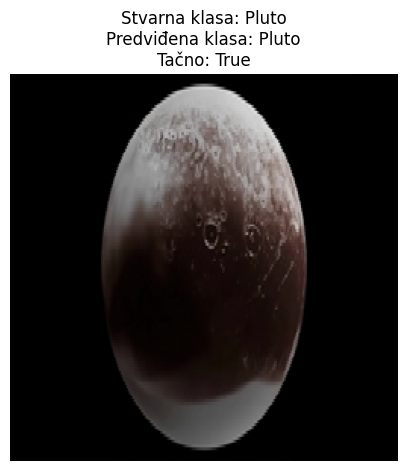

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 34ms/step


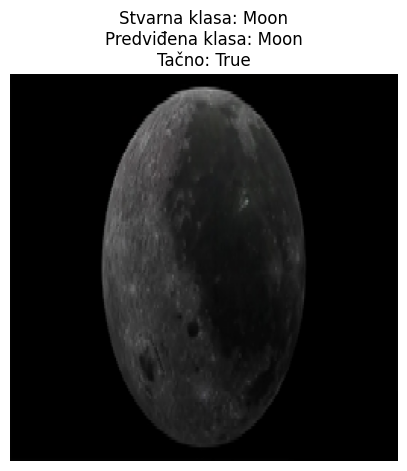

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 38ms/step


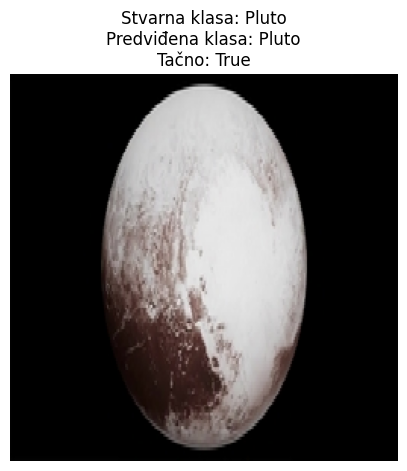

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 31ms/step


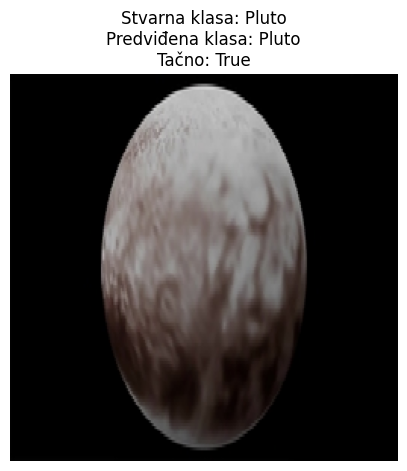

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 43ms/step


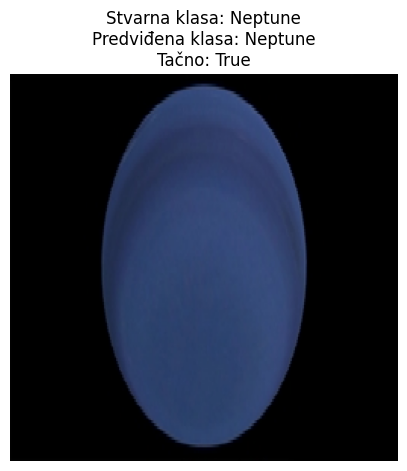

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 32ms/step


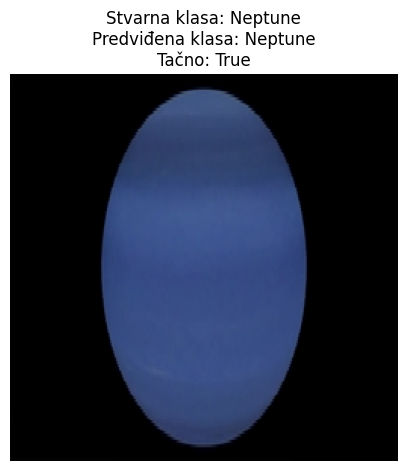

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 40ms/step


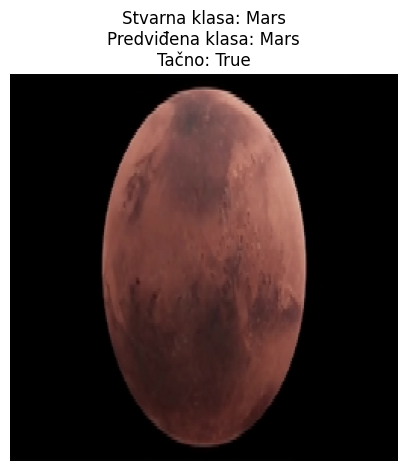

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 37ms/step


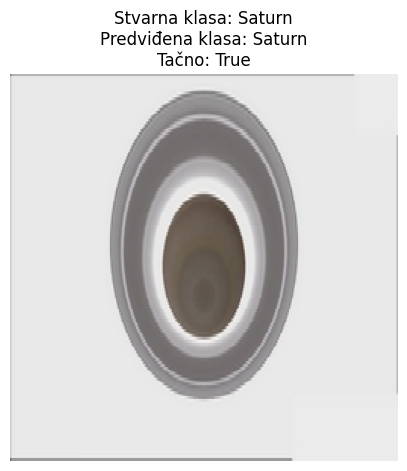

Stvarna klasa: Saturn, Predviđena klasa: Saturn, Tačno: True
1/1 [==============================] - 0s 33ms/step


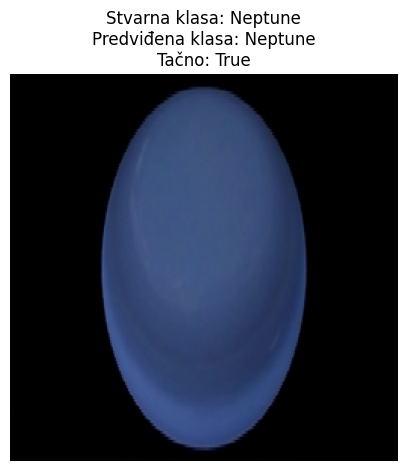

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 30ms/step


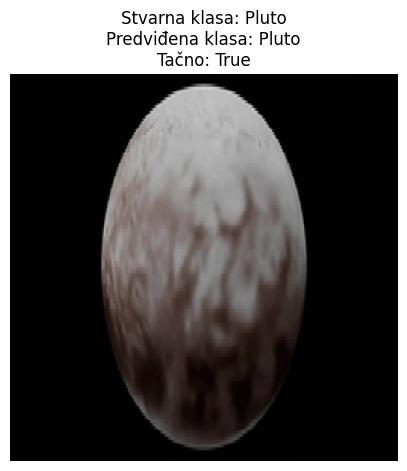

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 33ms/step


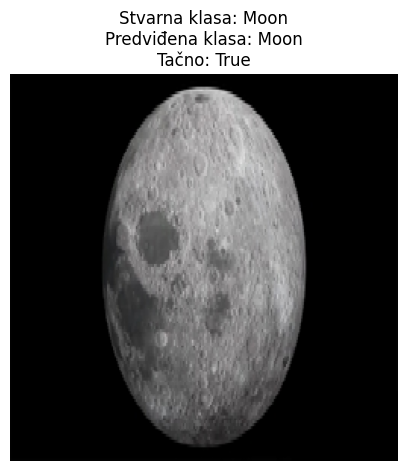

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 30ms/step


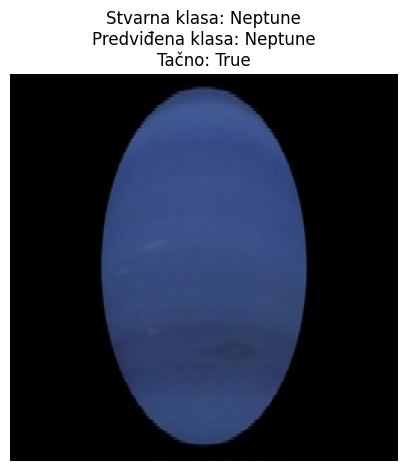

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 37ms/step


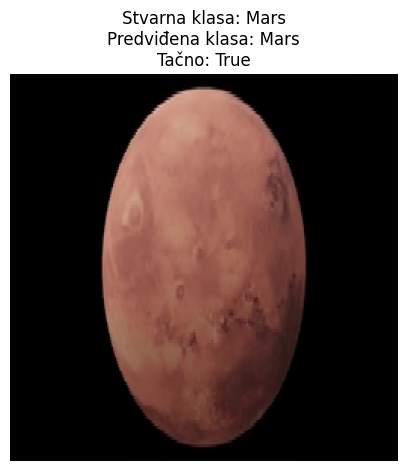

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 33ms/step


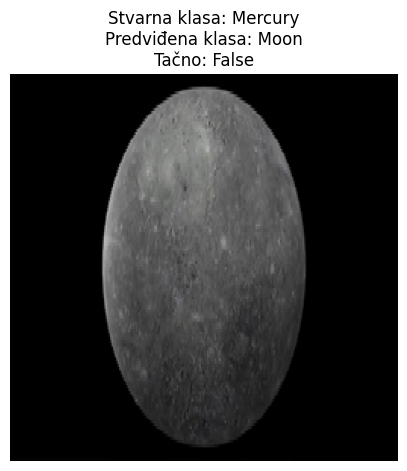

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 31ms/step


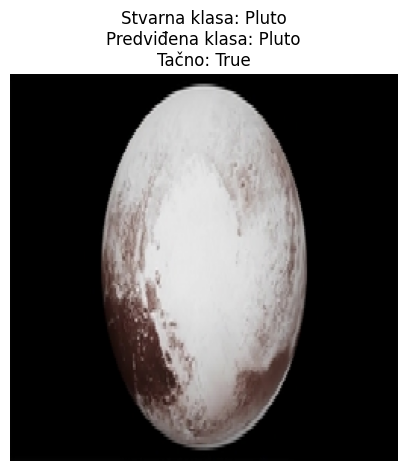

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 38ms/step


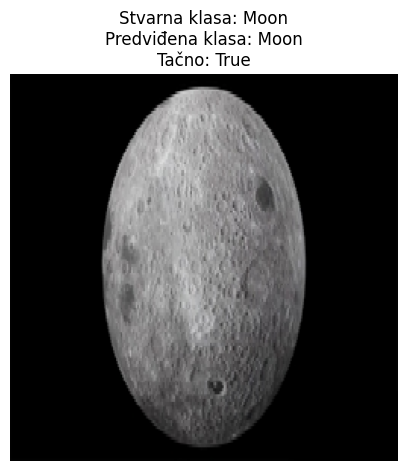

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 30ms/step


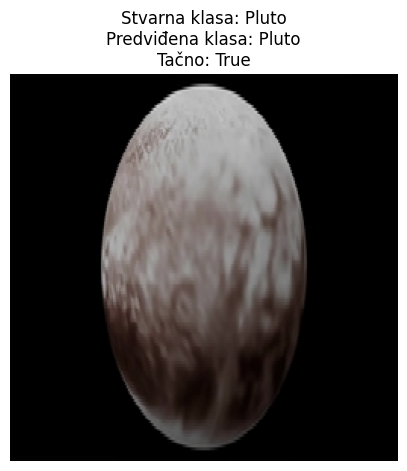

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 32ms/step


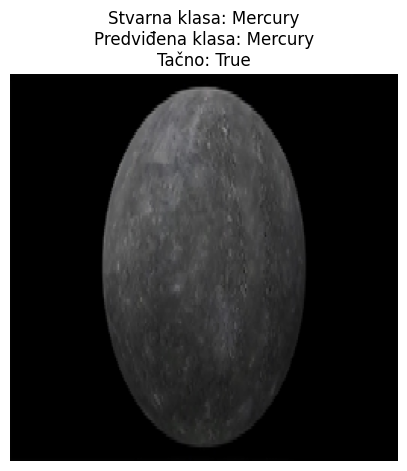

Stvarna klasa: Mercury, Predviđena klasa: Mercury, Tačno: True
1/1 [==============================] - 0s 30ms/step


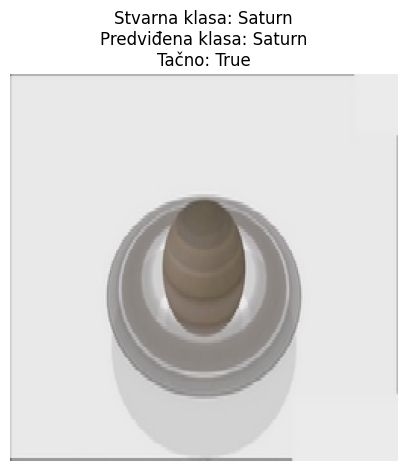

Stvarna klasa: Saturn, Predviđena klasa: Saturn, Tačno: True
1/1 [==============================] - 0s 31ms/step


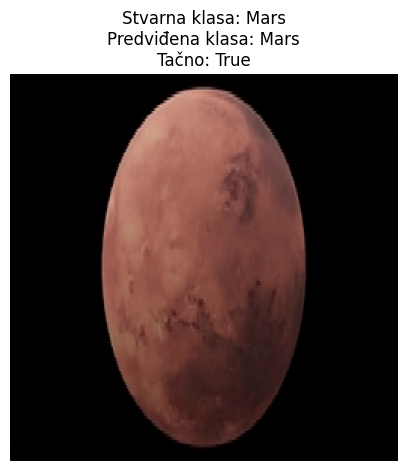

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 34ms/step


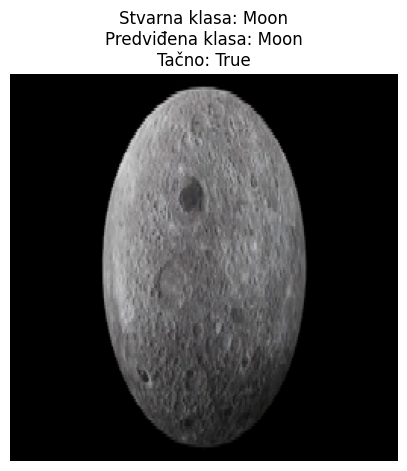

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 31ms/step


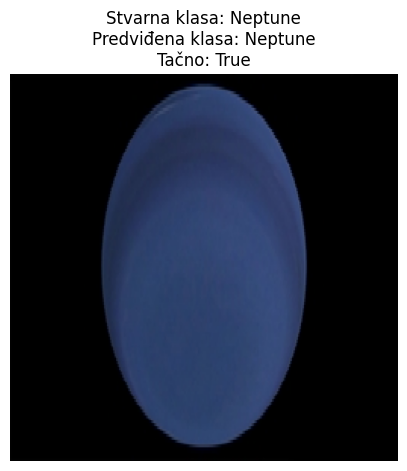

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


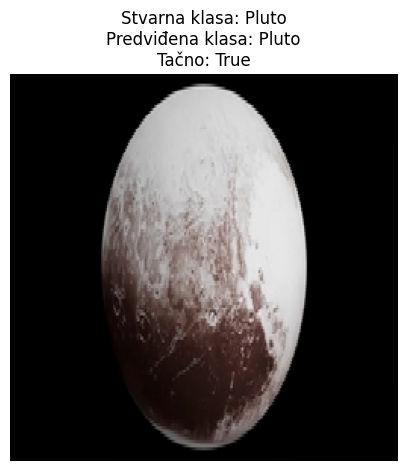

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 31ms/step


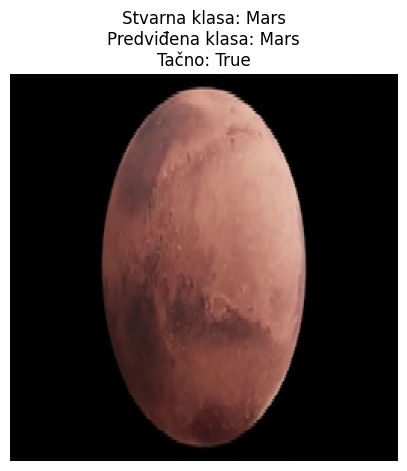

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 31ms/step


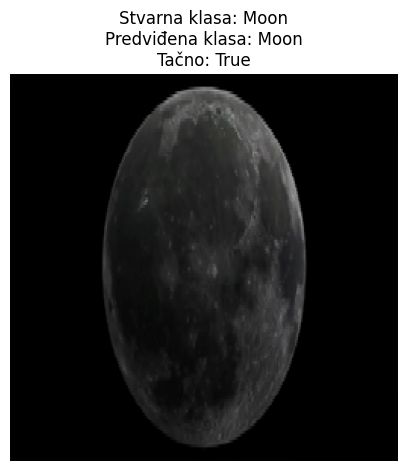

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 32ms/step


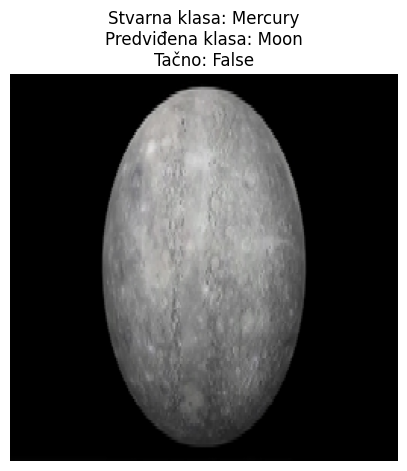

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 31ms/step


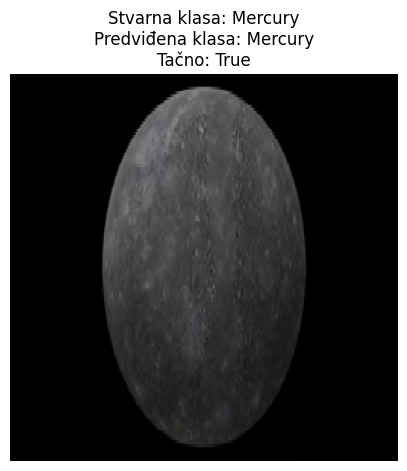

Stvarna klasa: Mercury, Predviđena klasa: Mercury, Tačno: True
1/1 [==============================] - 0s 31ms/step


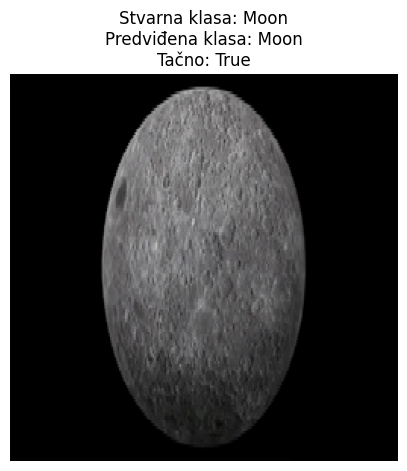

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 32ms/step


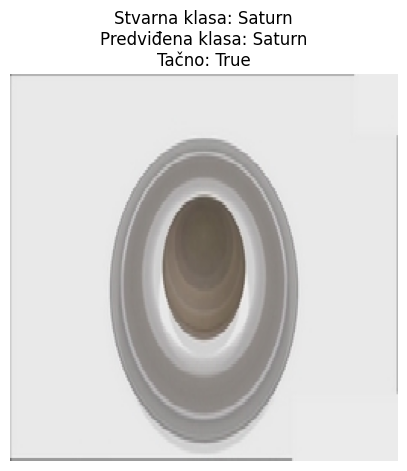

Stvarna klasa: Saturn, Predviđena klasa: Saturn, Tačno: True
1/1 [==============================] - 0s 32ms/step


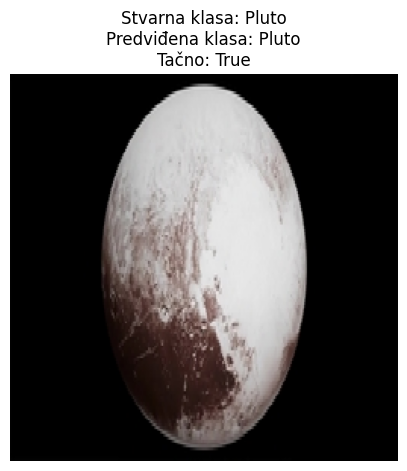

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 32ms/step


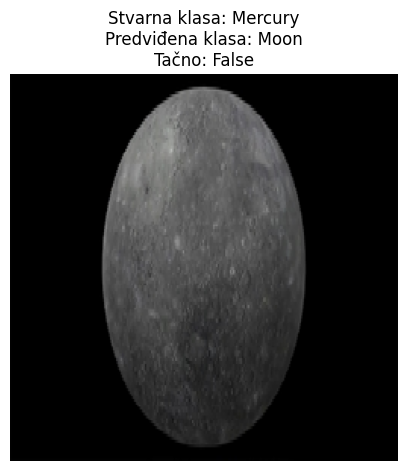

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 35ms/step


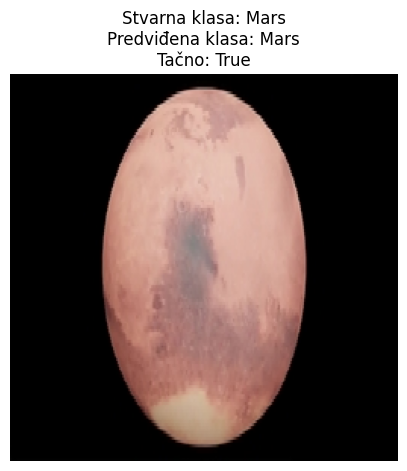

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 32ms/step


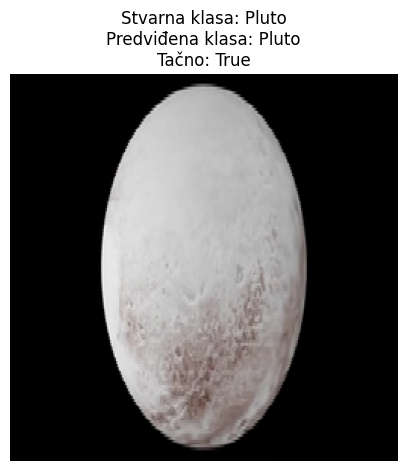

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 32ms/step


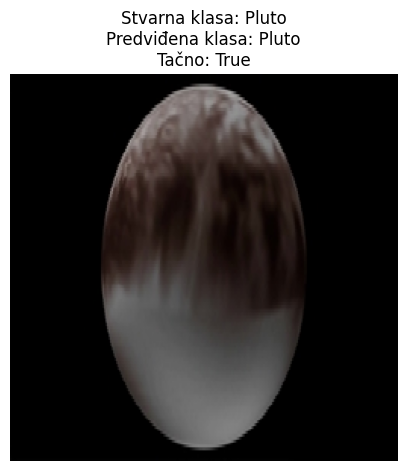

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
1/1 [==============================] - 0s 32ms/step


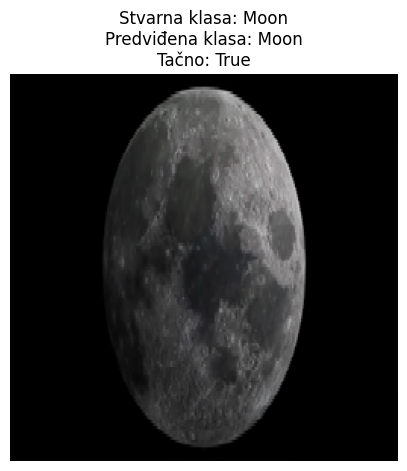

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 34ms/step


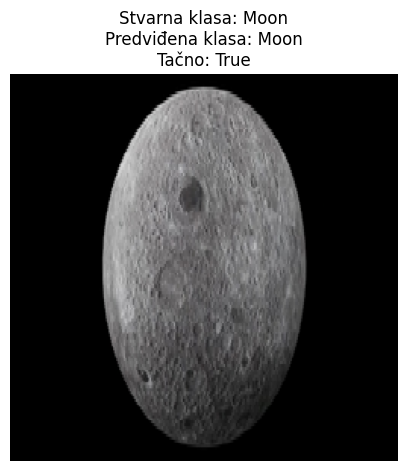

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 29ms/step


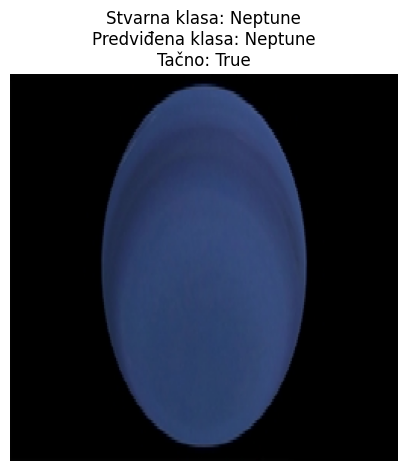

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


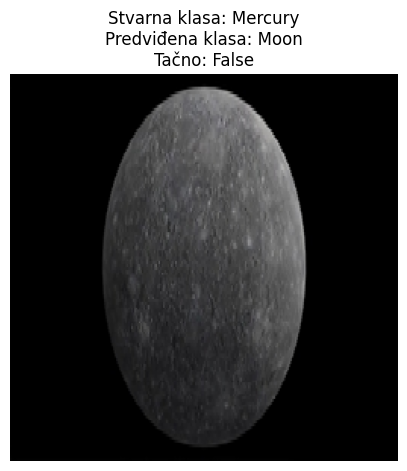

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 38ms/step


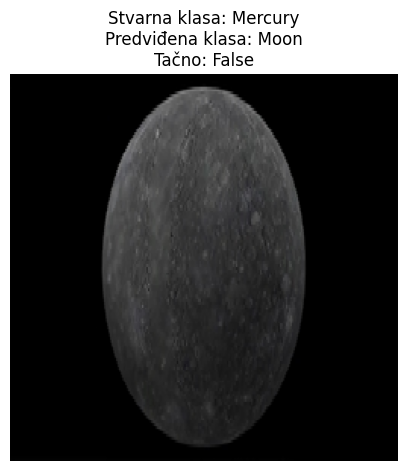

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


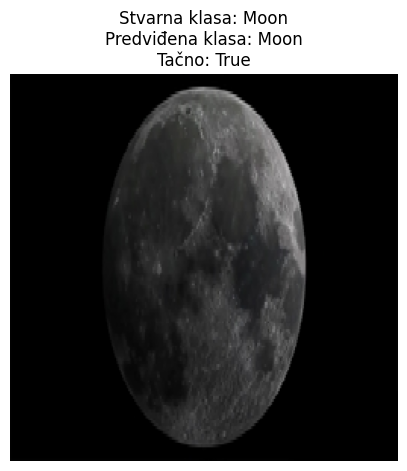

Stvarna klasa: Moon, Predviđena klasa: Moon, Tačno: True
1/1 [==============================] - 0s 30ms/step


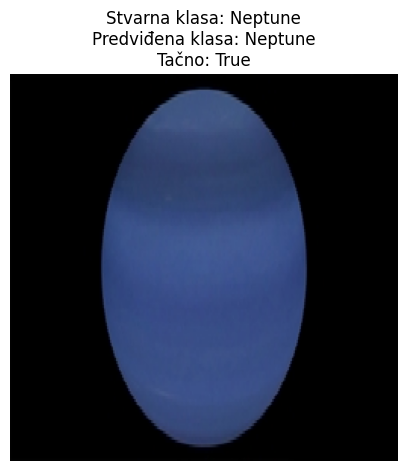

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 30ms/step


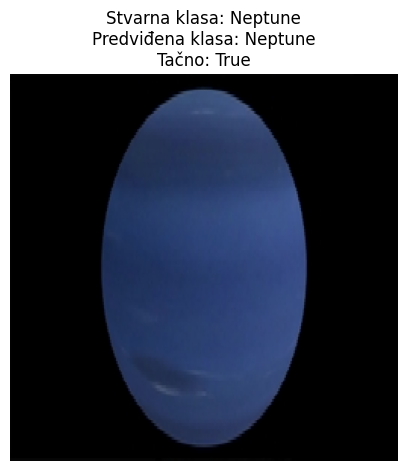

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 30ms/step


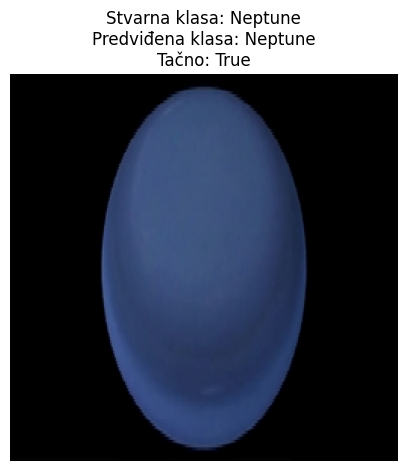

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 34ms/step


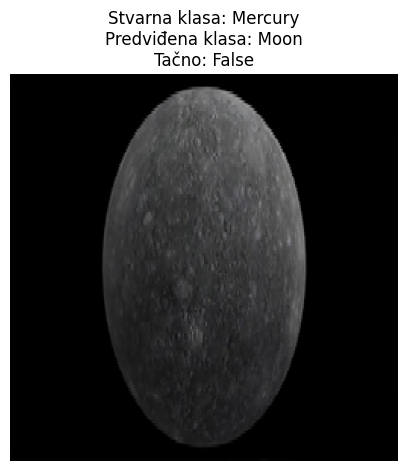

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 30ms/step


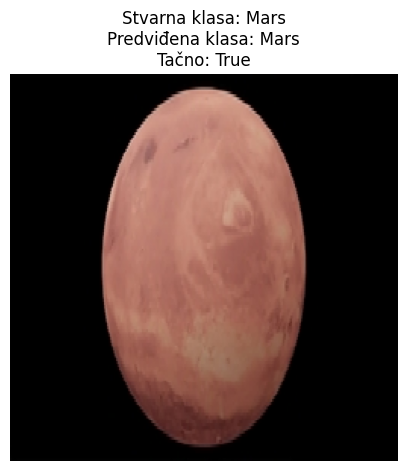

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 32ms/step


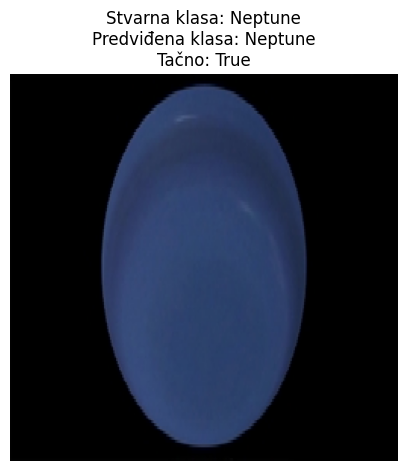

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


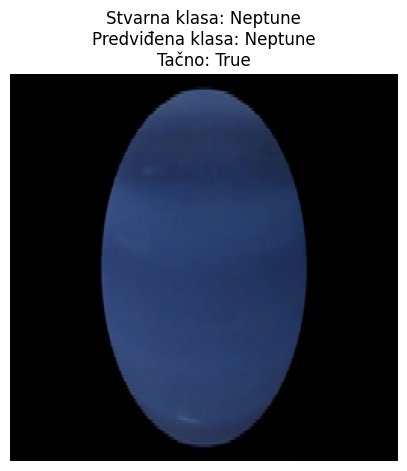

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 30ms/step


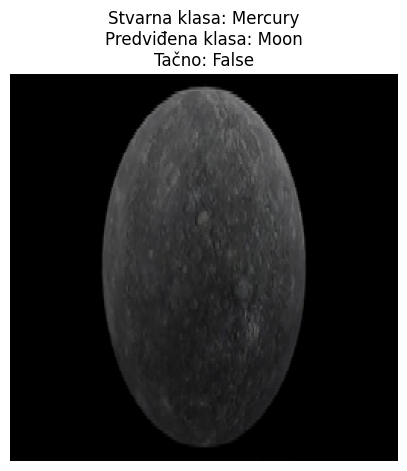

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 33ms/step


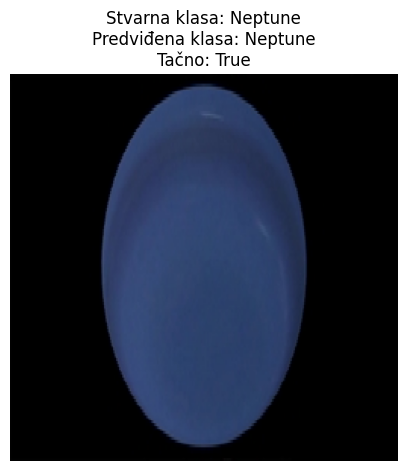

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


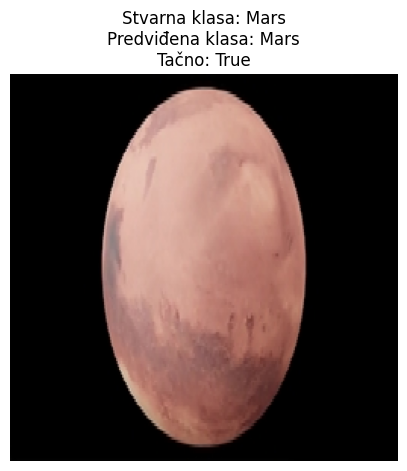

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 35ms/step


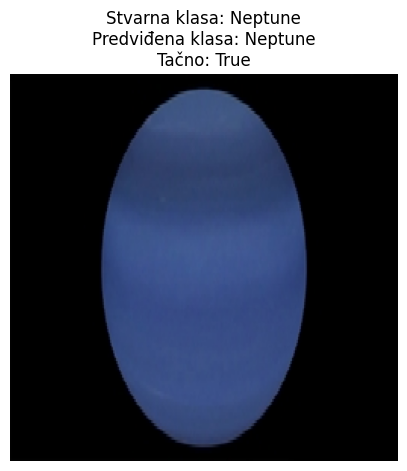

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


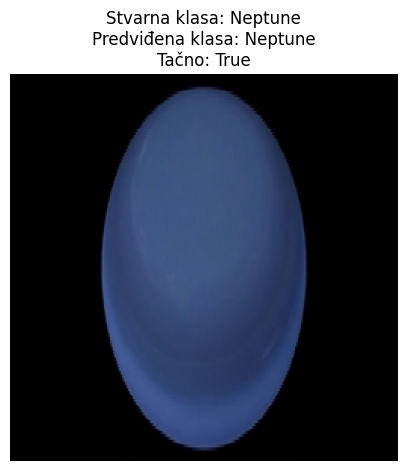

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 29ms/step


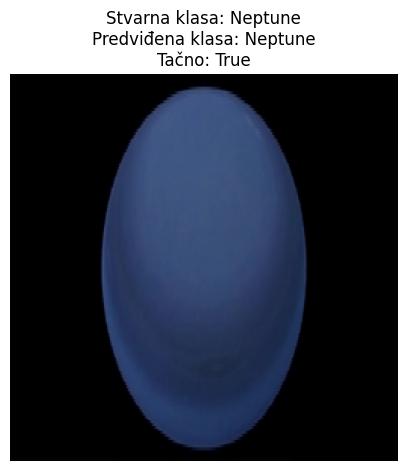

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 32ms/step


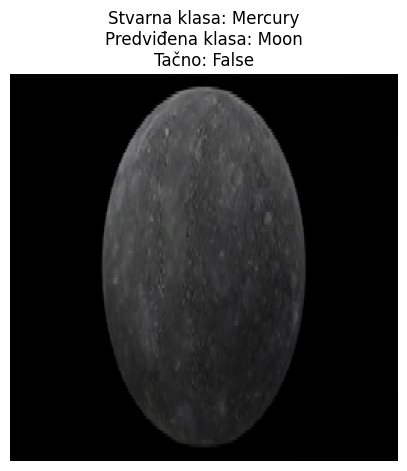

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 38ms/step


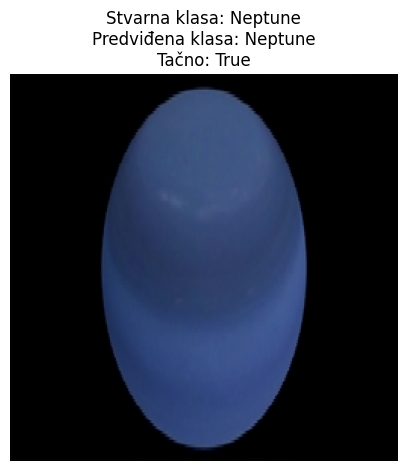

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


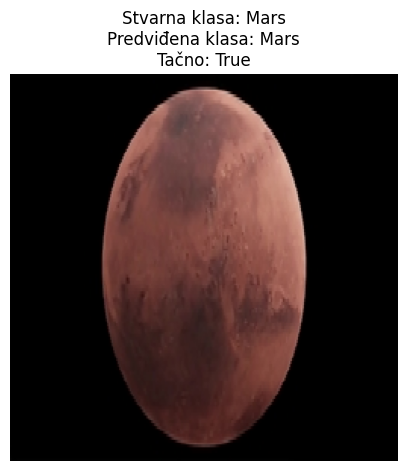

Stvarna klasa: Mars, Predviđena klasa: Mars, Tačno: True
1/1 [==============================] - 0s 32ms/step


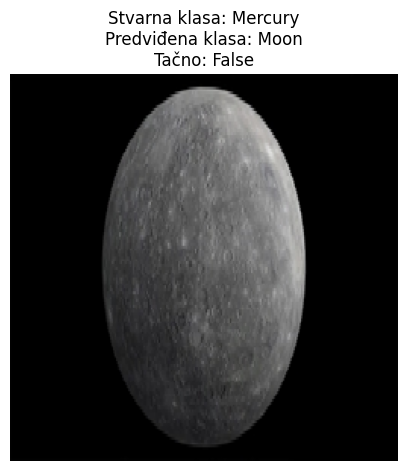

Stvarna klasa: Mercury, Predviđena klasa: Moon, Tačno: False
1/1 [==============================] - 0s 31ms/step


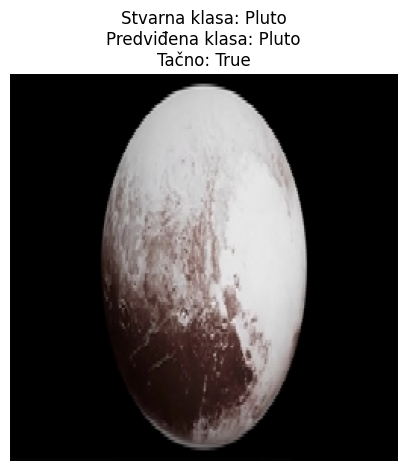

Stvarna klasa: Pluto, Predviđena klasa: Pluto, Tačno: True
Procenat tačnosti: 81.00%


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


correct_predictions = 0
total_predictions = 0

# Broj slika koje želite da testirate
num_images_to_test = 700  # ili koliko već želite

# Prikupljanje slika i labele iz testnog skupa
test_images = []
test_labels = []
count = 0
for images, labels in test_ds:  # Ovde ne koristimo unbatch().take(30)
    for i in range(images.shape[0]):  # Iteracija kroz sve slike u batch-u
        if count >= num_images_to_test:
            break  # Prekida se kada se dostigne željeni broj slika
        test_images.append(images[i])
        test_labels.append(labels[i])

        count += 1
    if count >= num_images_to_test:
        break  # Takođe prekida spoljnu petlju

# Izaberite 100 nasumičnih slika i njihove labele za prikaz
indices = np.random.choice(range(len(test_images)), 100, replace=False)


for i in indices:
    img = test_images[i]
    true_label_index = test_labels[i]
    true_label = class_names[int(true_label_index)]


    # Normalizacija slike za prikaz, ako je potrebno
    img_to_show = img
    if img_to_show.max() > 1.0:
        img_to_show = img_to_show / 255.0

    # Dodajte batch dimenziju i napravite predikciju
    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Provera da li je predviđena klasa tačna
    is_correct = true_label == predicted_class
    if is_correct:
        correct_predictions += 1
    total_predictions += 1

    # Opciono: prikažite sliku, pravu klasu i predviđenu klasu
    plt.figure(figsize=(5, 6))
    plt.imshow(img_to_show)
    plt.title(f"Stvarna klasa: {true_label}\nPredviđena klasa: {predicted_class}\nTačno: {is_correct}")
    plt.axis('off')
    plt.show()

    print(f"Stvarna klasa: {true_label}, Predviđena klasa: {predicted_class}, Tačno: {is_correct}")

# Izračunavanje i prikazivanje procenta tačnosti
accuracy_percentage = (correct_predictions / total_predictions) * 100
print(f"Procenat tačnosti: {accuracy_percentage:.2f}%")